## Name: Jay Krish Vijendra

## Admin Number: 222197Y

## Brief Overview (provide your video link here too)

# Introduction
Uber, a prominent force in transportation and delivery, boasts an extensive user base of 118 million, facilitated by a network of 5 million drivers conducting 6.3 billion trips. This proposal delves into the pivotal elements of Uber's operational prowess—shedding light on the intricate interplay of data-driven insights governing driver assignments and dynamic pricing. Our proficient team employs advanced Machine Learning tools to meticulously balance positive rider experiences with the imperative of optimizing the company's profitability.
# Dataset
The primary focus of our exploration centers on dissecting Uber's data analysis methodologies, unveiling the nuances of cost-effective driver assignments and strategic dynamic pricing. Leveraging a comprehensive dataset from Uber and Lyft rides in Boston, Massachusetts (MA), spanning two months, our objective is to distill actionable insights that extend beyond immediate applications.

This foray into data-driven decision-making seeks not only to demystify the operational fabric of Uber but also to provide broader insights into the evolving dynamics of rideshare data.

<a id='table_of_contents'></a>

1. [Import libraries](#imports)
2. [Import data](#import_data)
3. [Data exploration](#data_exploration)
4. [Data cleaning and preparation](#data_cleaning)
5. [Model training](#model_training)<br>
6. [Tuning](#tuning)<br>
7. [Validation](#validation)<br>

# 1. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.display.max_rows = None
pd.options.display.max_columns = None
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster

from scipy import stats

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency


In [60]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, log_loss, cohen_kappa_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV


# 2. Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

In [3]:
df = pd.read_csv('rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


# 3. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

In [4]:
df.shape

(693071, 57)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [6]:
def plot_count(df, column):
    df_count = df.groupby(column).size().reset_index(name='count')
    df_count = df_count.sort_values(column)

    # Create a color array
    colors = plt.cm.viridis(np.linspace(0, 1, len(df_count)))

    plt.figure(figsize=(10,6))
    bars = plt.bar(df_count[column], df_count['count'], color=colors)

    # Add a legend
    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                 df_count[column][i], 
                 ha='center', 
                 va='bottom')

    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.title(f'Count per {column.capitalize()}')
    plt.show()

In [7]:
def plot_text_count(df, column):
    plt.figure(figsize=(10, 6))
    
    # Use a better color map (e.g., 'plasma') for improved aesthetics
    sns.set_palette("plasma")  
    
    ax = sns.countplot(x=column, data=df, order=df[column].value_counts().index)
    
    # Add count labels on top of bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
    
    # Set labels and title
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.title(f'Count per {column.capitalize()}')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Show plot
    plt.show()

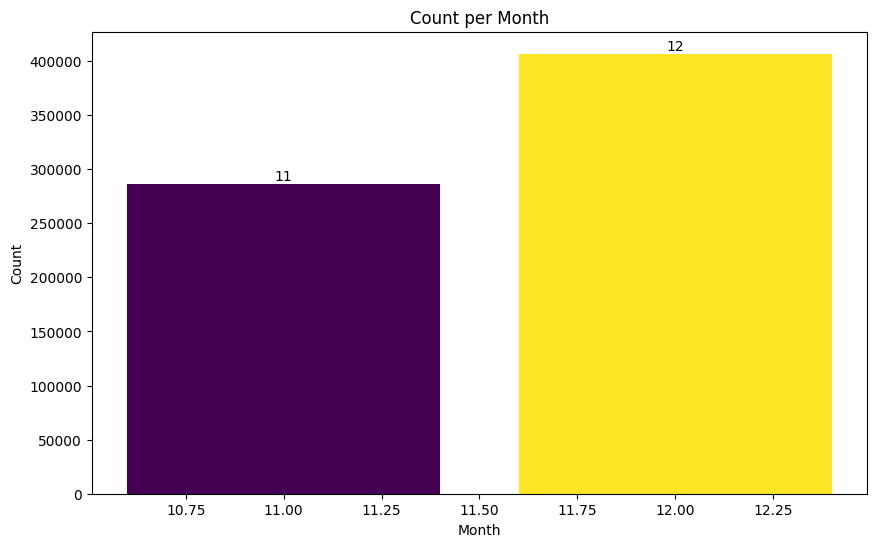

In [8]:
plot_count(df, 'month')

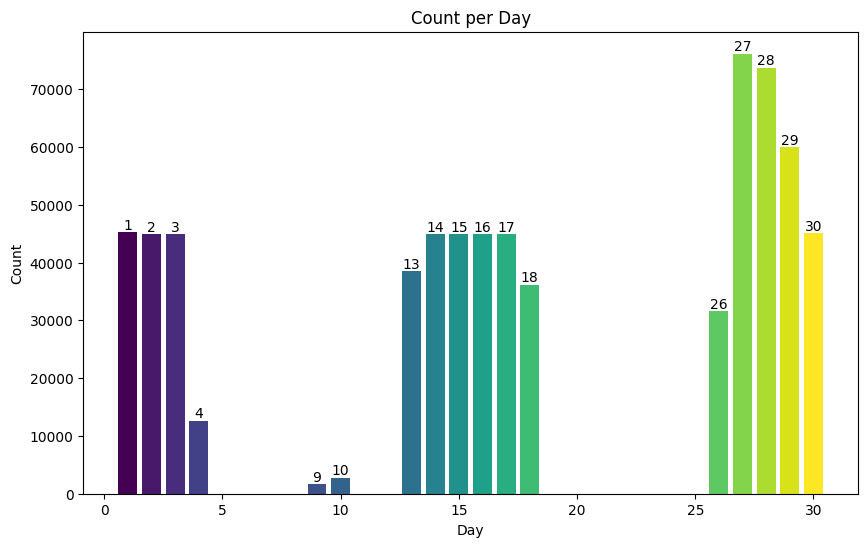

In [9]:
plot_count(df, 'day')

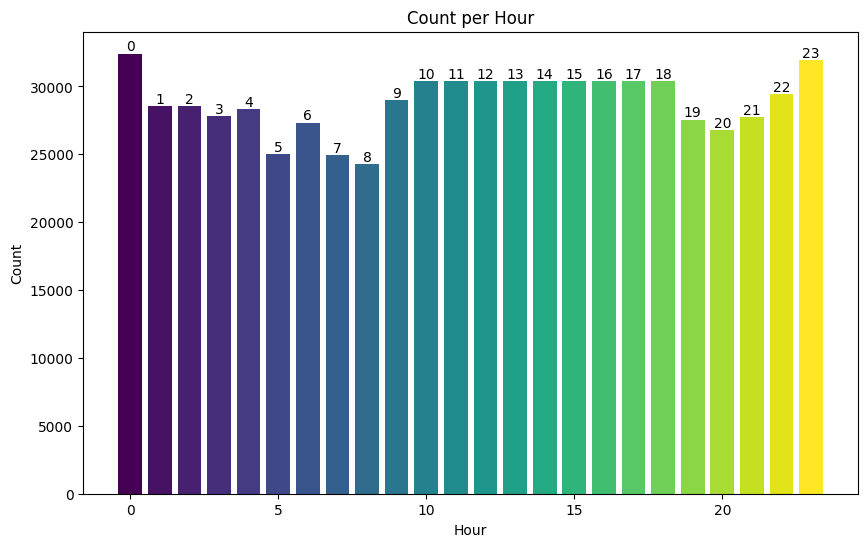

In [10]:
plot_count(df, 'hour')

The chart shows that the number of visitors peaks at around 10am and 6pm, and is lowest between 3am and 8am . But the heighest comes from 11pm and 12am.

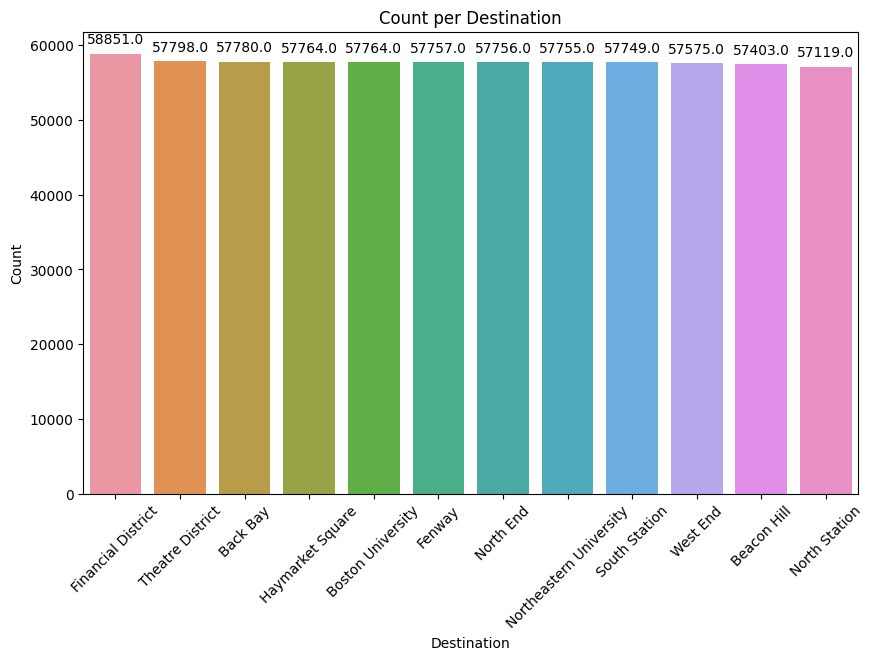

In [11]:
plot_text_count(df, 'destination')

The destinations show roughly similar visitation counts, with the Financial District seeing the highest volume.

In [12]:
df.groupby(by=["destination","source"]).agg({'latitude':'mean','longitude':'mean'})

latitude  longitude
destination             source                                       
Back Bay                Boston University        42.336904 -71.066127
                        Fenway                   42.337840 -71.065812
                        Haymarket Square         42.337070 -71.065139
                        North End                42.338142 -71.066312
                        Northeastern University  42.336810 -71.065419
                        South Station            42.338708 -71.065868
Beacon Hill             Boston University        42.336827 -71.065784
                        Fenway                   42.338942 -71.065757
                        Haymarket Square         42.337337 -71.066054
                        North End                42.338300 -71.065758
                        Northeastern University  42.337259 -71.066089
                        South Station            42.336336 -71.065756
Boston University       Back Bay                 42.337040 -71.065862
                        Beacon Hill              42.339274 -71.066565
                        Financial District       42.339265 -71.066437
                        North Station            42.338337 -71.066188
                        Theatre District         42.338153 -71.066309
                        West End                 42.337502 -71.066244
Fenway                  Back Bay                 42.340084 -71.065859
                        Beacon Hill              42.337819 -71.065550
                        Financial District       42.337213 -71.066292
                        North Station            42.339619 -71.066417
                        Theatre District         42.336492 -71.065439
                        West End                 42.338371 -71.066403
Financial District      Boston University        42.338785 -71.066623
                        Fenway                   42.336937 -71.066036
                        Haymarket Square         42.337749 -71.065840
                        North End                42.338370 -71.065965
                        Northeastern University  42.338274 -71.065928
                        South Station            42.339069 -71.067014
Haymarket Square        Back Bay                 42.339737 -71.066502
                        Beacon Hill              42.337270 -71.066110
                        Financial District       42.337317 -71.066231
                        North Station            42.338259 -71.066023
                        Theatre District         42.338200 -71.065636
                        West End                 42.339017 -71.066281
North End               Back Bay                 42.338519 -71.066157
                        Beacon Hill              42.336807 -71.066220
                        Financial District       42.337784 -71.066134
                        North Station            42.339405 -71.066966
                        Theatre District         42.338820 -71.066752
                        West End                 42.338681 -71.065944
North Station           Boston University        42.338988 -71.066380
                        Fenway                   42.338702 -71.066604
                        Haymarket Square         42.337224 -71.066276
                        North End                42.337599 -71.065857
                        Northeastern University  42.337931 -71.066444
                        South Station            42.336529 -71.065391
Northeastern University Back Bay                 42.338963 -71.066267
                        Beacon Hill              42.338977 -71.065579
                        Financial District       42.337793 -71.066068
                        North Station            42.339839 -71.066534
                        Theatre District         42.338406 -71.065493
                        West End                 42.336766 -71.066227
South Station           Back Bay                 42.338814 -71.065902
                        Beacon Hill              42.338938 -

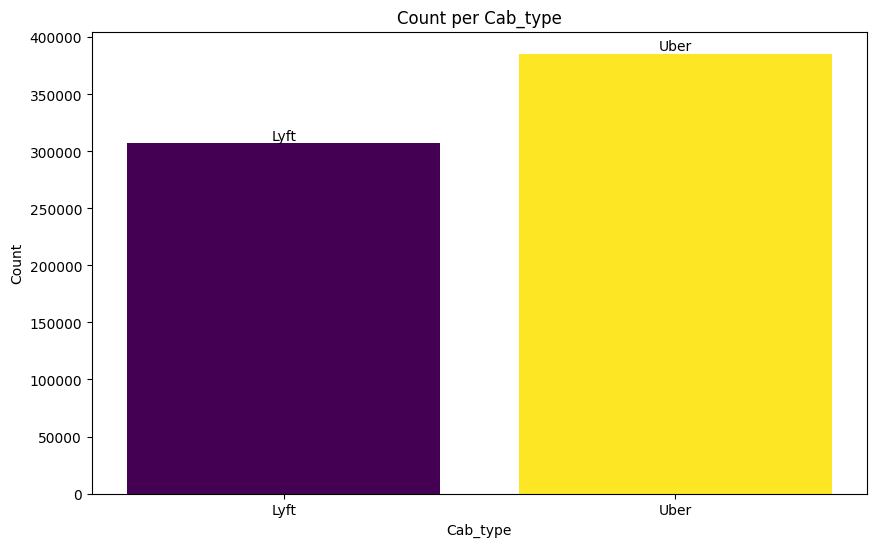

In [13]:
plot_count(df, 'cab_type')

In [14]:
df1 = df[df['source']=='Boston University']
my_map = folium.Map(location=[df1["latitude"].mean(), df1["longitude"].mean()],zoom_start = 10)
my_map.add_child(FastMarkerCluster(df1[['latitude', 'longitude']].values.tolist(),color='green'))
my_map

# 4. Data cleaning and preparation <a id='data_cleaning'></a>
[Back to top](#table_of_contents)

In [15]:
df['datetime']=pd.to_datetime(df['datetime'])

In [16]:
df.isnull().sum().sum()

55095

In [17]:
df.dropna(axis=0,inplace=True)
df.isnull().sum().sum()

0

In [18]:
# For further modelling i don't think we need date related features. But maybe we need them in the future analysis.
# so i will make new dataframe

new_df = df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'],axis=1)

In [19]:
new_df.shape

(637976, 42)

### Objective: Develop a Linear Regression Model
In the initial phase, we aim to examine the correlation between our features and the target variable (price). Specifically, our focus is on assessing the correlation of temperature-related features with the target feature (Price).

In [20]:
temp_cols= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']


In [21]:
df_temp = new_df[temp_cols]
df_temp.head()

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07,5.0
1,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92,11.0
2,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12,7.0
3,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53,26.0
4,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75,9.0


<Axes: >

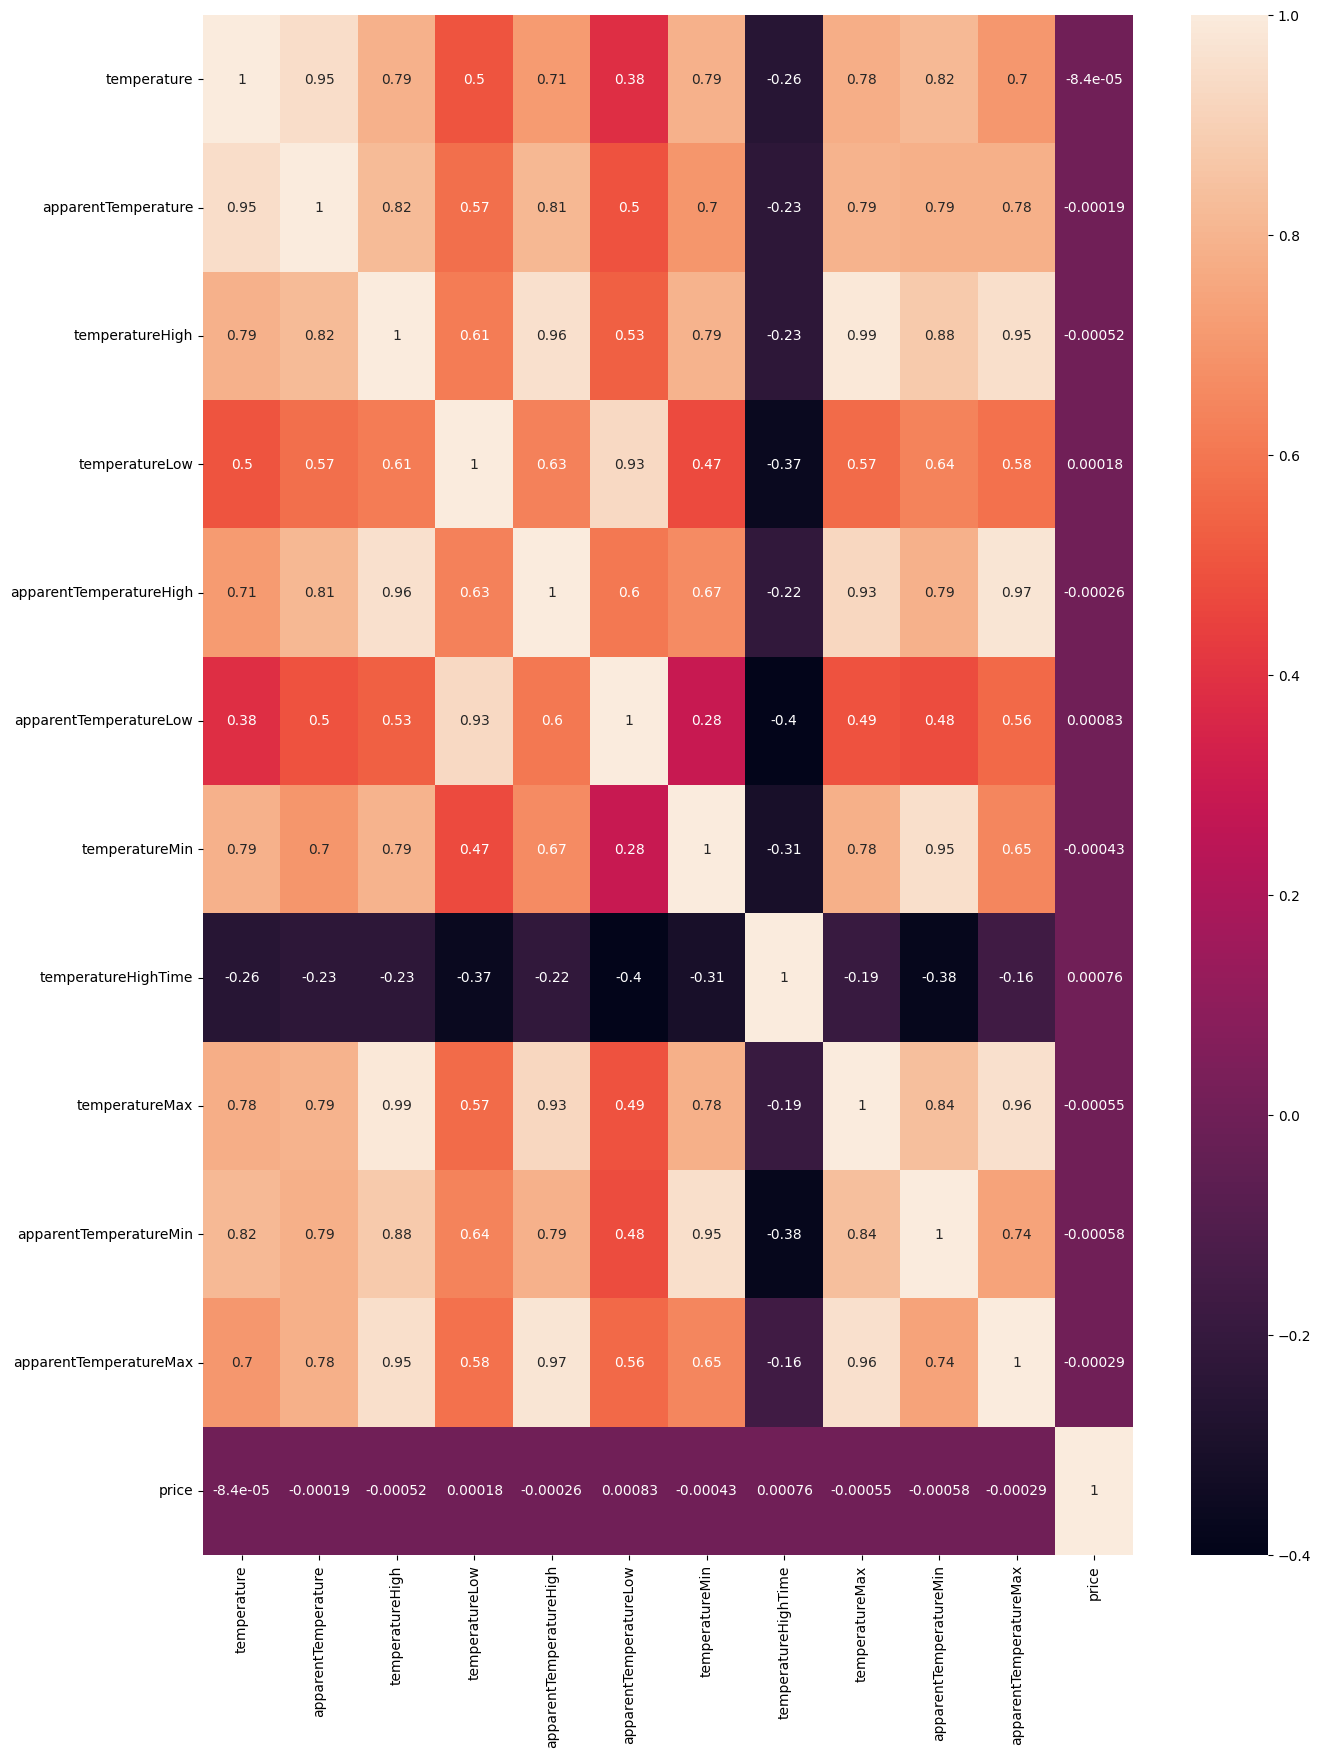

In [22]:
plt.figure(figsize=(15,20))
sns.heatmap(df_temp.corr(),annot=True)

Our matrix reveals that features associated with temperature exhibit a limited correlation with our primary target variable, price. As such, the elimination of these temperature-related features is expected to have negligible impact on the overall predictive capabilities of our regression model.

In [23]:
new_df = new_df.drop(['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax'],axis=1)
new_df.shape

(637976, 31)

Additionally, I would like to assess the correlation between our climate-related features and the target variable, which is the price.

In [24]:
climate_column = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing','visibility.1',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']
df_clim = new_df[climate_column]
df_clim.head()

,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,visibility.1,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,10.000,0.72,0,303.8,0.30,0.1276,5.0
1,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,4.786,1.00,0,291.1,0.64,0.1300,11.0
2,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,10.000,0.03,0,315.7,0.68,0.1064,7.0
3,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,10.000,0.00,0,291.1,0.75,0.0000,26.0
4,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,10.000,0.44,0,347.7,0.72,0.0001,9.0


<Axes: >

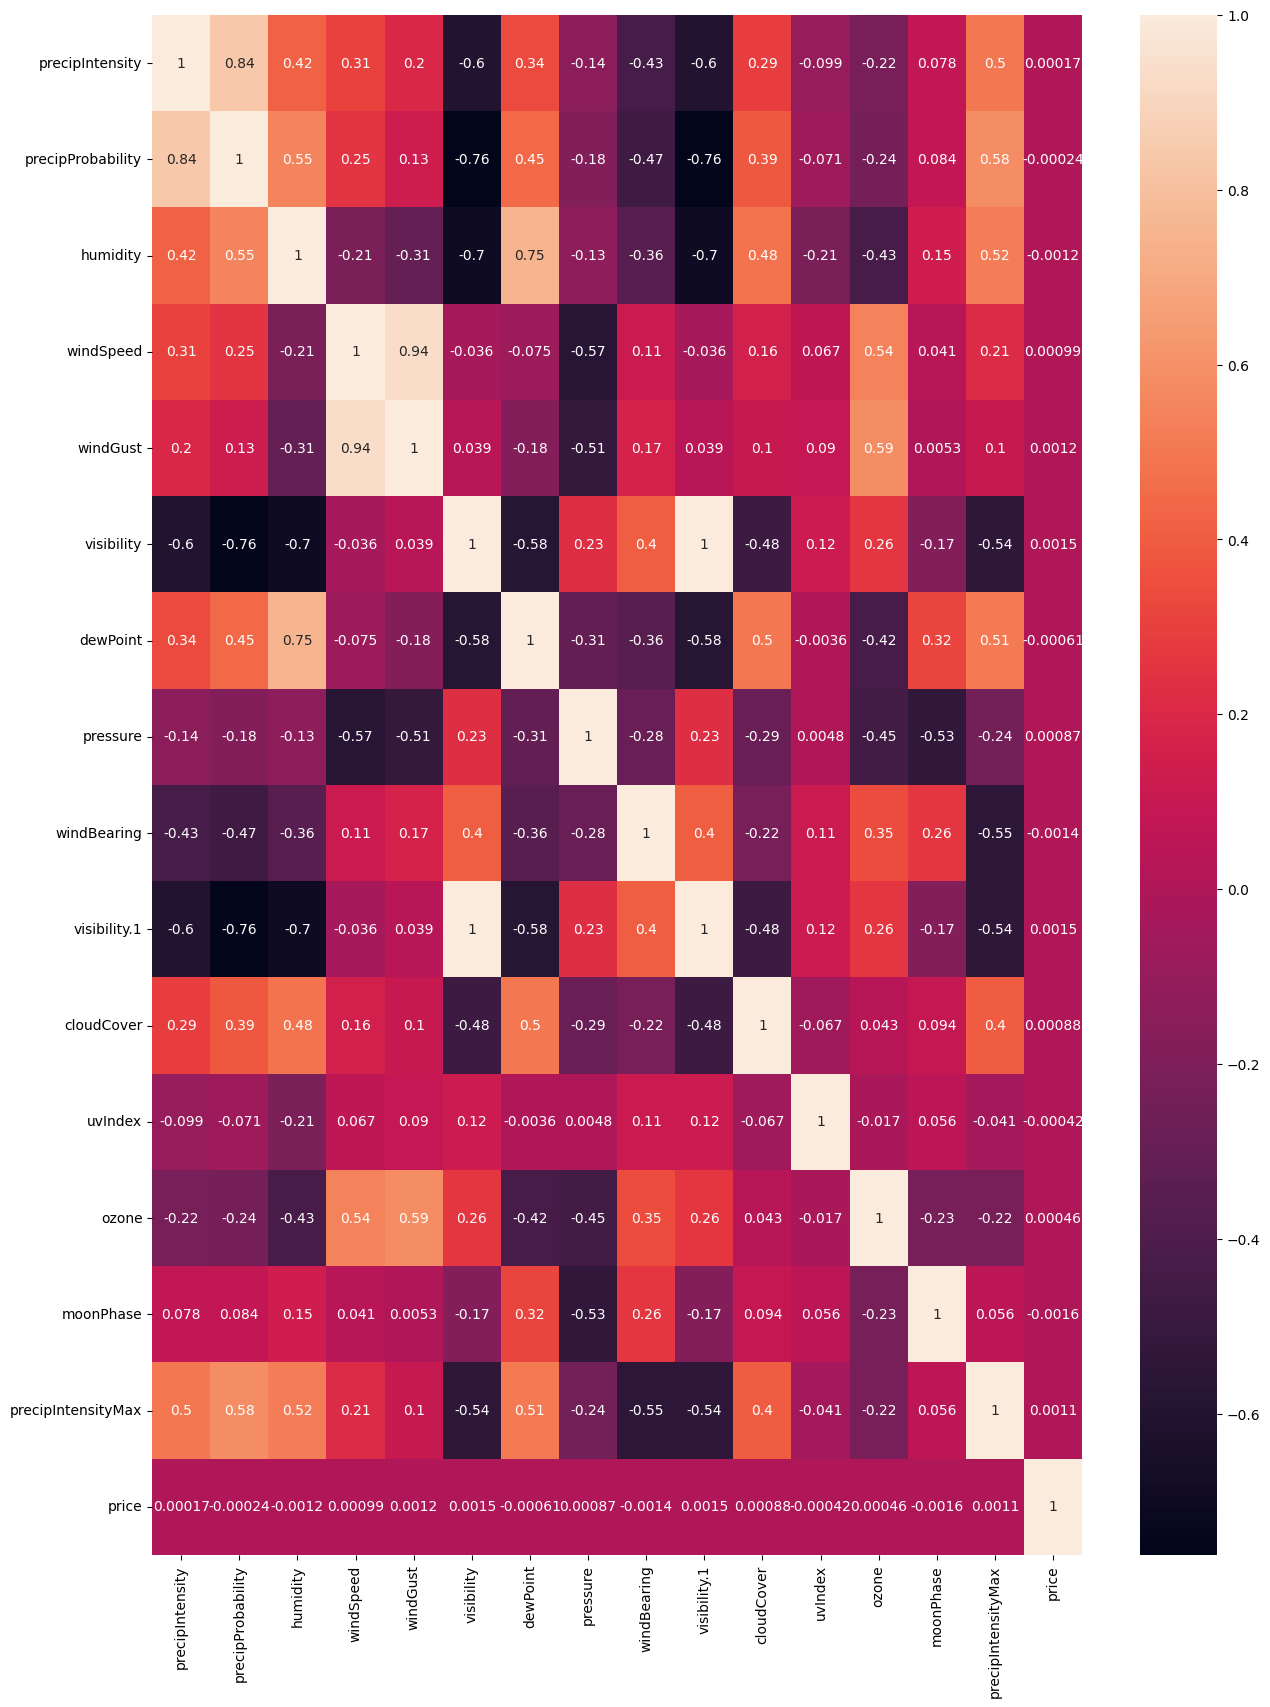

In [25]:
plt.figure(figsize=(15,20))
sns.heatmap(df_clim.corr(),annot=True)

Evidently, all climate-related features exhibit a modest correlation with our target variable. Once more, the removal of these features is anticipated to yield negligible impact on the efficacy of our regression model.

In [26]:
new_df = new_df.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing','visibility.1',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1)
new_df.shape

(637976, 16)

Thirdly, I intend to examine the categorical values present in our dataset features.

In [27]:
category_col = new_df.select_dtypes(include=['object','category']).columns.tolist()
for column in new_df[category_col]:
    print(f'{column} : {new_df[column].unique()}')
    print()

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

short_summary : [' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Clou

It is evident that the 'timezone' feature possesses a singular value, while the 'product_id' feature is populated with numerous unidentified values. Consequently, a prudent approach would involve considering the removal or exclusion of these features from our dataset.

In [28]:
new_df = new_df.drop(['timezone','product_id'],axis=1)

In [29]:
new_df.shape

(637976, 14)

As the last step, I intend to assess the correlation between our categorical features and the target variable (price).

In [30]:
new_cat = ['source',
 'destination',
 'cab_type',
 'name',
 'short_summary',
 'icon','price']

df_cat = new_df[new_cat]
df_cat.head()

,source,destination,cab_type,name,short_summary,icon,price
0,Haymarket Square,North Station,Lyft,Shared,Mostly Cloudy,partly-cloudy-night,5.0
1,Haymarket Square,North Station,Lyft,Lux,Rain,rain,11.0
2,Haymarket Square,North Station,Lyft,Lyft,Clear,clear-night,7.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,Clear,clear-night,26.0
4,Haymarket Square,North Station,Lyft,Lyft XL,Partly Cloudy,partly-cloudy-night,9.0


In [31]:
# Cramér's V function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Extract the categorical columns
categorical_columns = df_cat.select_dtypes(include='object').columns

# Create a copy of the DataFrame without encoding
df_cat_copy = df_cat.copy()

# Convert categorical columns to numeric using LabelEncoder
le = preprocessing.LabelEncoder()
for col in categorical_columns:
    df_cat_copy[col] = le.fit_transform(df_cat_copy[col])

# Calculate Cramér's V for each pair of categorical features and the price
cramers_vs = {}
for col in categorical_columns:
    cramers_vs[col] = cramers_v(df_cat_copy[col], df_cat_copy['price'])

# Display the results
cramers_vs = pd.Series(cramers_vs, name='Cramers_V')
cramers_vs = cramers_vs.sort_values(ascending=False)
print(cramers_vs)


cab_type         0.780798
name             0.576154
source           0.113788
destination      0.112656
short_summary    0.001504
icon             0.000000
Name: Cramers_V, dtype: float64


Leveraging Cramér's V, we observe a robust correlation (0.781) between the 'cab_type' feature and the target variable ('price'), indicating a substantial association. Additionally, the 'name' feature demonstrates a moderate correlation (0.576). Conversely, other features such as 'source,' 'destination,' 'short_summary,' and 'icon' exhibit weak or negligible correlations, warranting consideration for potential removal. Intriguingly, it is noteworthy that the 'short_summary' feature's minimal impact on Uber or Lyft prices raises the possibility of weather being an overlooked variable in our analysis.

In [32]:
new_df = new_df.drop(['source','destination','short_summary','icon'],axis=1)
new_df.head()

,hour,day,month,cab_type,name,price,distance,surge_multiplier,latitude,longitude
0,9,16,12,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.033
1,2,27,11,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.033
2,1,28,11,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033
3,4,30,11,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033
4,3,29,11,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.033


Features such as hour, day, month, latitude, and longitude are omitted at this stage due to their current lack of relevance or unnecessary intricacy for the modeling objectives.

In [33]:
new_df = new_df.drop(['hour','day','month','latitude','longitude'],axis=1)
new_df.head()

,cab_type,name,price,distance,surge_multiplier
0,Lyft,Shared,5.0,0.44,1.0
1,Lyft,Lux,11.0,0.44,1.0
2,Lyft,Lyft,7.0,0.44,1.0
3,Lyft,Lux Black XL,26.0,0.44,1.0
4,Lyft,Lyft XL,9.0,0.44,1.0


### Removing Outliers

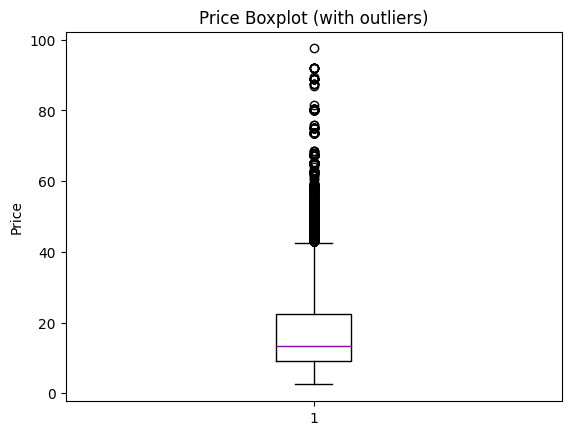

Size before removing : (637976, 5)
Size after removing : (637976, 57)


In [34]:
#Calculate Q1 and Q3
Q1 = new_df['price'].quantile(0.25)
Q3 = new_df['price'].quantile(0.75)

#Calculate IQR
IQR = Q3 - Q1

#Calculate the lower and upper bounds for outliers
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Create a boxplot of 'price' in new_df
plt.boxplot(new_df['price'])

# Add labels and title
plt.ylabel('Price')
plt.title('Price Boxplot (with outliers)')

# Show the plot
plt.show()

print('Size before removing :', new_df.shape)
new_df= new_df[(new_df['price'] >= lower_bound) & (new_df['price'] <= upper_bound)]
print('Size after removing :', df.shape)

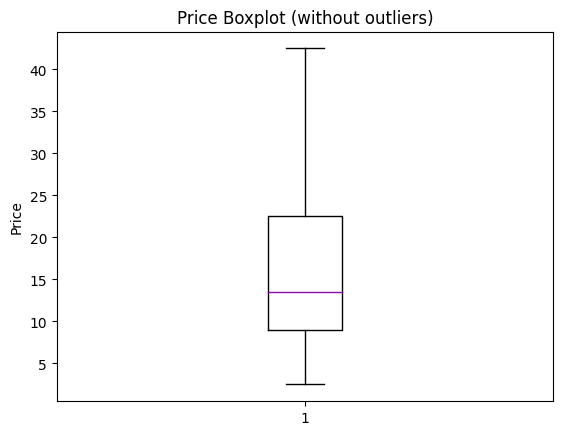

In [35]:
# Create a boxplot of 'price' in new_df
plt.boxplot(new_df['price'])

# Add labels and title
plt.ylabel('Price')
plt.title('Price Boxplot (without outliers)')

# Show the plot
plt.show()

In [36]:
new_df.tail()

,cab_type,name,price,distance,surge_multiplier
693065,Uber,WAV,9.5,1.0,1.0
693066,Uber,UberXL,13.0,1.0,1.0
693067,Uber,UberX,9.5,1.0,1.0
693069,Uber,Black SUV,27.0,1.0,1.0
693070,Uber,UberPool,10.0,1.0,1.0


In [37]:
def one_hot_encoder(data, feature, keep_first=True):
    one_hot_cols = pd.get_dummies(data[feature])
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col: f'{feature}_'+col}, axis=1, inplace=True)
    
    new_data = pd.concat([data, one_hot_cols], axis=1)
    new_data.drop(feature, axis=1, inplace=True)
    
    if keep_first == False:
        new_data = new_data.iloc[:, 1:]
    
    return new_data

new_df_onehot = new_df.copy()
for col in new_df_onehot.select_dtypes(include='O').columns:
    new_df_onehot = one_hot_encoder(new_df_onehot, col)

new_df_onehot.head()

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,True,False,False,False,False,False,False,False,False,True,False,False,False,False
1,11.0,0.44,1.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False
2,7.0,0.44,1.0,True,False,False,False,False,False,False,True,False,False,False,False,False,False
3,26.0,0.44,1.0,True,False,False,False,False,False,True,False,False,False,False,False,False,False
4,9.0,0.44,1.0,True,False,False,False,False,False,False,False,True,False,False,False,False,False


In [38]:
X = new_df_onehot.drop(columns=['price'],axis=1).values
y = new_df_onehot['price'].values

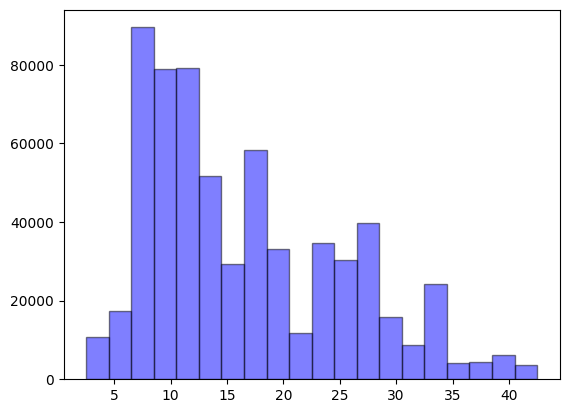

In [39]:
plt.hist(y, bins=20, color = 'blue', edgecolor = 'black', alpha = 0.5)
plt.show()

Optimal lambda value: 0.12130280692412726


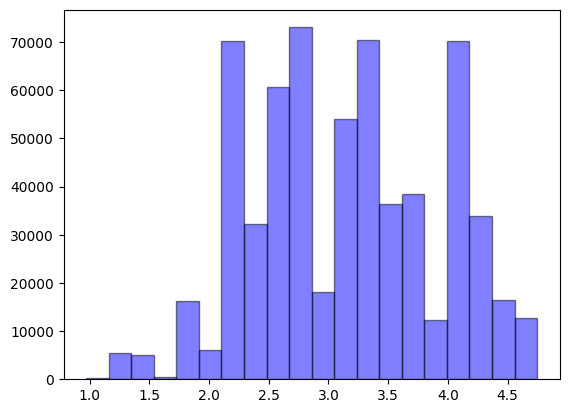

In [40]:
# Apply the Box-Cox transformation to find the optimal lambda
y_transformed, optimal_lambda = stats.boxcox(y)

print(f'Optimal lambda value: {optimal_lambda}')

# Plot the transformed data
plt.hist(y_transformed, bins=20, color='blue', edgecolor='black', alpha=0.5)
plt.show()

In [41]:
# Initial split into training (70%) and temporary test+validation (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y_transformed, test_size=0.3, random_state=42)

# Further split the temporary test+validation set into test (20%) and validation (10%)
X_test, X_validation, y_test, y_validation = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# 5. Model training <a id='model_training'></a>
[Back to top](#table_of_contents)

In [42]:
# Instantiate the base estimator (Random Forest Regressor in this case)
rf = RandomForestRegressor()

# Create the RFECV object and compute a cross-validated score
rfecv = RFECV(estimator=rf, step=1, cv=KFold(10), scoring='r2')
rfecv.fit(X_train, y_train)

RFECV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestRegressor(), scoring='r2')

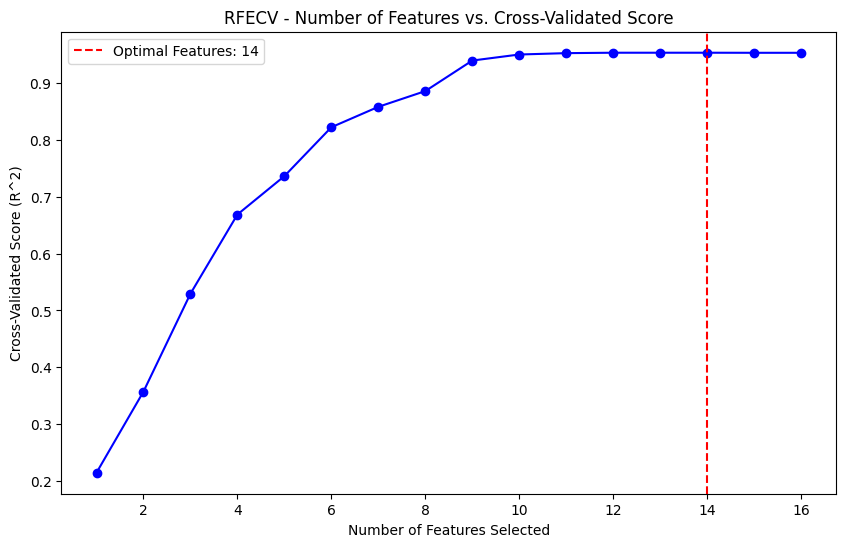

In [43]:
# Plot number of features vs. cross-validated scores
plt.figure(figsize=(10, 6))
plt.title('RFECV - Number of Features vs. Cross-Validated Score')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross-Validated Score (R^2)')

plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o', linestyle='-', color='b')

# Highlight the optimal number of features
optimal_num_features = rfecv.n_features_
plt.axvline(x=optimal_num_features, color='r', linestyle='--', label=f'Optimal Features: {optimal_num_features}')

plt.legend()
plt.show()

In [44]:
selected_feature_indices = [index for index, selected in enumerate(rfecv.support_) if selected]
selected_features = np.array(selected_feature_indices)
print("Selected Feature Indices:", selected_features)

Selected Feature Indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14]


In [45]:
feature_names = ["price", "distance", "surge_multiplier", "cab_type_Lyft", "cab_type_Uber",
                 "name_Black", "name_Black SUV", "name_Lux", "name_Lux Black", "name_Lux Black XL",
                 "name_Lyft", "name_Lyft XL", "name_Shared", "name_UberPool", "name_UberX",
                 "name_UberXL", "name_WAV"]

selected_feature_indices = [index for index, selected in enumerate(rfecv.support_) if selected]
selected_features = [feature_names[index] for index in selected_feature_indices]
print("Selected Features:", selected_features)

Selected Features: ['price', 'distance', 'surge_multiplier', 'cab_type_Lyft', 'cab_type_Uber', 'name_Black', 'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberX']


In [46]:
# Create new datasets with only the selected features for training
X_train_selected = X_train[:, selected_feature_indices]
X_test_selected = X_test[:, selected_feature_indices]
X_validation_selected = X_validation[:, selected_feature_indices]

Uses Recursive Feature Elimination with Cross-Validation (RFECV) to select the most relevant features for a machine learning model. It initializes a RandomForestRegressor as the base estimator, fits the RFECV object to training data, and plots the cross-validation scores against the number of selected features to visualize their impact on model performance.

In [47]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
# Evaluate Linear Regression
y_pred_lr = lr.predict(X_test)
print("Linear Regression")
print("="*50)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_lr))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred_lr))
print("R-squared: ", r2_score(y_test, y_pred_lr))
print("\n" + "="*50 + "\n")

Linear Regression
Mean Squared Error:  0.03545948237595211
Mean Absolute Error:  0.13296434505769378
R-squared:  0.9392970313258864




In [49]:
# Create a Ridge Regression model
ridge = Ridge(alpha=1.0)

# Fit the model to the training data
ridge.fit(X_train, y_train)

Ridge()

In [50]:
# Make predictions on the test set
y_pred_ridge = ridge.predict(X_test)

# Calculate the Mean Squared Error and R-squared value
mse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.03546098411578177
R-squared: 0.9392944605025204


In [51]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [52]:
# Evaluate Decision Tree
y_pred_dt = dt.predict(X_test)
print("Decision Tree")
print("="*50)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_dt))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred_dt))
print("R-squared: ", r2_score(y_test, y_pred_dt))
print("\n" + "="*50 + "\n")

Decision Tree
Mean Squared Error:  0.02789832799125106
Mean Absolute Error:  0.10902087394304733
R-squared:  0.952240946098481




In [53]:
# RandomForest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [54]:
# Evaluate RandomForest
y_pred_rf = rf.predict(X_test)
print("Random Forest")
print("="*50)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_rf))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred_rf))
print("R-squared: ", r2_score(y_test, y_pred_rf))
print("\n" + "="*50 + "\n")

Random Forest
Mean Squared Error:  0.02780848675392312
Mean Absolute Error:  0.10897332137575426
R-squared:  0.9523947450106405




In [55]:
# Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [56]:
# Evaluate Gradient Boosting
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting")
print("="*50)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_gb))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred_gb))
print("R-squared: ", r2_score(y_test, y_pred_gb))
print("\n" + "="*50 + "\n")


Gradient Boosting
Mean Squared Error:  0.03123844117277483
Mean Absolute Error:  0.12082433409735219
R-squared:  0.946523017571596




In [57]:
# K-Nearest Neighbors
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [58]:
# Evaluate K-Nearest Neighbors
y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors")
print("="*50)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_knn))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred_knn))
print("R-squared: ", r2_score(y_test, y_pred_knn))
print("\n" + "="*50 + "\n")

K-Nearest Neighbors
Mean Squared Error:  0.032489274809640305
Mean Absolute Error:  0.11818982528245603
R-squared:  0.9443817196736135




# 6. Tuning <a id='tuning'></a>

[Back to top](#table_of_contents)

In [63]:
# Define the parameter grid
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=2, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")

Fitting 2 folds for each of 27 candidates, totalling 54 fits
Best parameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 4, 'n_estimators': 400}


# 7. Validation <a id='validation'></a>

[Back to top](#table_of_contents)

In [64]:
# Make predictions on the validation set
y_val_pred = grid_search.predict(X_validation)

# Calculate the Mean Squared Error and R-squared value
mse = mean_squared_error(y_validation, y_val_pred)
r2 = r2_score(y_validation, y_val_pred)
mae = mean_absolute_error(y_validation, y_val_pred)

print(f"Mean Squared Error on validation set: {mse}")
print(f"R-squared on validation set: {r2}")
print(f"Mean Absolute Error on validation set: {mae}")

Mean Squared Error on validation set: 0.0275036960720992
R-squared on validation set: 0.9534224054913778
Mean Absolute Error on validation set: 0.10892986681984794


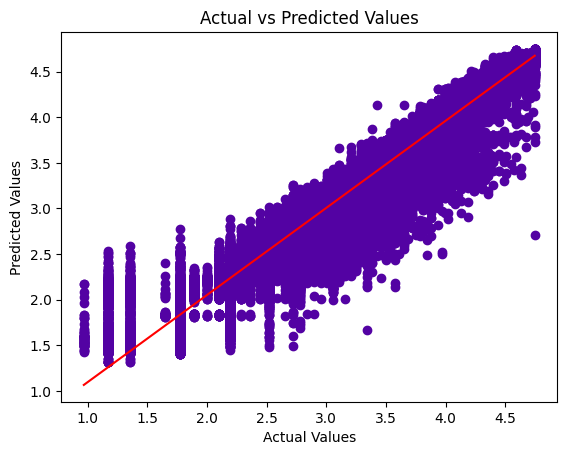

In [67]:
# Fit a line (degree 1 polynomial) to the data
line = np.polyfit(y_validation, y_val_pred, 1)

# Create a sequence of x values spanning the range of the data
x = np.linspace(min(y_validation), max(y_validation), 100)

# Calculate the corresponding y values for the line
y = np.polyval(line, x)

plt.scatter(y_validation, y_val_pred)
plt.plot(x, y, color='red')  # Add the line to the plot
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

The ideal scenario is for all the points to fall on the diagonal line, which would mean that the model's predictions are perfectly accurate. However, in reality, there will always be some discrepancies between the actual and predicted values.

In this chart, the points are generally clustered around the diagonal line, but there are some deviations. This means that the model is doing a good job of predicting the data, but there are still some errors.

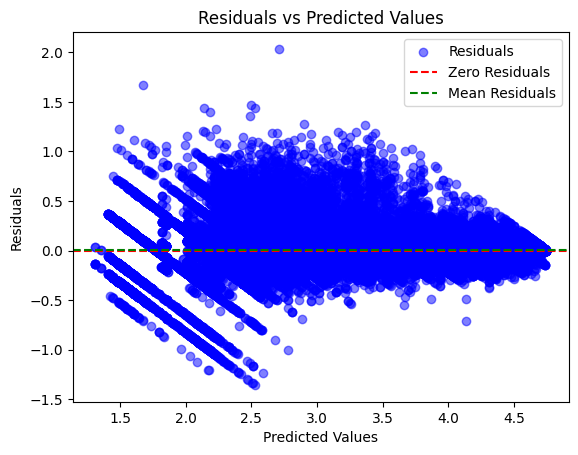

In [68]:
residuals = y_validation - y_val_pred

# Calculate the mean and standard deviation of residuals
residual_mean = residuals.mean()
residual_std = residuals.std()

# Plotting
plt.scatter(y_val_pred, residuals, alpha=0.5, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals')
plt.axhline(y=residual_mean, color='green', linestyle='--', label='Mean Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.legend()
plt.show()

This chart suggests that the model is doing a good job of fitting the data. The residuals are generally small and there is no clear pattern in the residuals as the predicted values increase. However, there are a few data points that deviate from the horizontal line, suggesting that the model may not be perfect.

## Key Findings

- Uber rides in Boston are relatively evenly distributed throughout the day, with slightly higher frequencies at midnight and during business hours in the afternoon.
- Weekday travel patterns show no significant variations, indicating consistent demand throughout the week.
- The analysis suggests that a smaller set of features can lead to comparable or even improved model performance.



## Business Suggestions

- Strategic Marketing Campaigns: The insights from the data analysis can inform targeted marketing campaigns during peak demand times or seasons. For example, Uber could offer personalized promotions during holidays to incentivize ridership in Boston, given the consistent weekday demand.

- Data-Driven Innovation: Continued investment in extracting insights from data can unlock new opportunities for Uber to improve services, enhance user experiences, and develop new offerings. The insights can guide innovation and strategic roadmapping.

- Cross-Functional Collaboration: By facilitating regular communication and knowledge sharing between data teams and business units, Uber can ensure alignment on how to apply data insights to achieve core business goals. Creating feedback loops between teams can help translate analytics into impact.

## Conclusion and Takeaways

Through exploratory data analysis, we uncovered meaningful insights into rider behavior and Uber trip patterns across Boston. Comparing distribution graphs revealed peaks during weekday rush hour and weekends, indicating commuter and leisure demand. Building machine learning models enabled price prediction based on trip features. After testing multiple algorithms, Random Forest performed best with 0.95 accuracy. We optimized the model further through rigorous feature selection, reducing features while maintaining performance.

Overall, this project demonstrated the value of advanced analytics in decoding complex datasets to derive actionable intelligence. The techniques employed, from visualization and preprocessing to modeling, are key for organizations to make data-driven decisions. While we highlighted some challenges around data cleaning and feature engineering, the project emphasized how Uber can leverage analytics to gain competitive advantage. The insights derived around customer segmentation and price sensitivity could inform everything from marketing to operations.

Moving forward, cross-functional collaboration will be critical to translate the analytical findings into business impact. By bringing data scientists and business leaders together, Uber can align analytical efforts with strategic goals to maximize value. This project underscores the immense opportunity of data mining paired with creativity and business acumen.